In [1]:
# movies.csv: https://www.kaggle.com/datasets/danielgrijalvas/movies

# Description: ~7000 movies from IMDB

# Column values include Title, Rating, Genre, Year, Date Released, IMDB Score, Runtime of the Movie, and net Gross of the Movie

# Motivation: What makes a movie "good"?

# General Flow:
# Load in Dataset
# Transform Dataset
# Looking at the columns, brainstorm possible relationship ideas

# Look at average rating over time
# Possible relationship between year and rating

# Look at average rating for each genre
# Possible relationship between genre and rating

# Look at certificate vs rating
# Possible relationship between certificate and rating

# Look at runtime vs rating
# Possible relationship between runtime and rating

# Hypothesize a linear relationship
# Run regression on dataset looking for that linear relationship
# Conclude results

# Use relationship for prediction for upcoming movies

<h1> Predicting the Gross Outcome of a Movie Using Data From IMDB </h1>

<h5> Jacob Orndoff </h5>
<h5> CMSC320 - University of Maryland, College Park </h5>
<h5> December 16th, 2022 </h5>

<h2> Table of Contents </h2>

<ol>
    <li> <a href="#introduction"> Introduction </a>
        <ul>
            <li><a href="#PLUL">Programming Language and Used Libraries</a></li>
            <li><a href="#dataset">The Dataset</a></li>
        </ul>
    </li>
    <li> <a href="#data_analysis"> Data Analysis </a>
        <ul>
        </ul>
    </li>
</ol>

<h1 id="introduction">Introduction </h1>

<p>In 2018 alone, nearly <a href="https://www.statista.com/statistics/187122/movie-releases-in-north-america-since-2001/">900 movies were released in the United States and Canada.</a> With so many movies, the film industry is incredibly competitive and businesses are constantly trying to find the formula for making successful movies. New trends and a constantly evolving world can make this very difficult but using data science techniques, it's possible. Looking at how past movies performed and which of their specific attributes may have lead to their success can aid businesses with getting an idea of the projected gross of a movie they're planning to make. This can clearly be very useful for a couple of reasons including businesses can have data on projected gross of their movies for shareholders and in their future plans, they can pivot away from films that look like they will be unsuccessful and instead use their resources on higher predicted gross films.  </p>

<p>In this tutorial, we will be going through an example of what was explained above. The goal is to analyze data on previous movies and their success in order to develop a mathmatical model to help us predict the gross of new and upcoming movies. Then we can evaluate the model and it's predictions to see how well it's performed which can give us an idea on how to develop an even better one.</p>

<h5 id="PLUL">Programming Language and Used Libraries </h5>

<p>Before getting into it, a few things should be explained. To begin, during the entirity of this tutorial, all coding will be done in Python 3.10. If interested, more information on Python can be found <a href="https://www.python.org/">here</a>. Next up, we should talk about which packages will be used. Down below is the import list but it's good to highlight the general use of each one. First is <a href="https://matplotlib.org/">matplotlib</a> which will be used for graphs, plots, and general visualizations of our data. Next is <a href="https://numpy.org/">numpy</a> which is just common package used to ease scientific computing. Then there is <a href="https://pandas.pydata.org/">pandas</a> which is an incredibly important package as it helps handle data analysis and data manipulation. We'll be using pandas to read in the dataset we will be using and to manipulate the data to get some important information out of it. Second to last is <a href="https://seaborn.pydata.org/">seaborn</a> which is another statistical data visualization package. It's very similar to matplotlib and we will be using them in conjungtion in order to make the plots of our data look a little better. Finally, we have <a href="https://www.statsmodels.org/stable/index.html">statsmodels</a> which will be the main package we use to develop our mathmatical model.</p>

<p> The import list is below: </p>

In [2]:
# All imports for the project

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

<h5 id="dataset">The Dataset</h5>

<p>The last thing to introduce before we get into actual data analysis is the dataset. The dataset we will be using for this project comes from <a href="https://www.kaggle.com/">Kaggle.com</a> which is an online community platform for data scientists and those alike. The dataset we're using can be found <a href="https://www.kaggle.com/datasets/danielgrijalvas/movies">here</a> and is title "Movie Industry". It is a compilation of nearly four decades of movies data from IMDB with nearly ~7700 movies in total, 220 movies per year from 1986-2020. For ease of use, the dataset has been downloaded into a csv which you can do yourself after creating an account on Kaggle. Using the pandas method <a href="https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html">pandas.read_csv</a>, let's load in the dataset and get an idea of what it looks like.</p>

In [3]:
# Loading in the dataset into a Pandas Dataframe named movie_data, getting the dimensions of the dataframe using the
# df.shape method, and printing out the first 5 films.

movie_data = pd.read_csv("movies.csv")

print("The shape of the dataset is:", movie_data.shape)

movie_data.head()

The shape of the dataset is: (7668, 15)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


<p> From this output, we can see a couple of things. First, using the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html">pandas.Dataframe.shape</a> method, we get the dimensions of the dataset which is 7668 by 15. This essentially means that wae have 7668 entries and each entry has 15 columns (or 7668 movies each having 15 attributes for our situation). Then, using the <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html">pandas.Dataframe.head</a> method, we see the first 5 movies of the dataset and the 15 attributes for each one. </p>

<p>Using pandas.Dataframe.head, we can see what the column values actually are. We having "name" which is the movies name, "rating" which is the movies rating, "genre" which is it's main genre, "year" which is the release year for the movie, "released" which is the exact data and place of when and where the movie was released, "score" which is the movies IMDB score, "votes" which is the number of IMDB user votes, "director" which is the movies director, "writer" which is the movies main writer, "star" which is the movies main star, "country" which is the movies country of origin, "budget" which is the budget of the movie, "gross" which is the movies net revenue, "company" which is the production company for the movie, and last but not least "runtime" which is the duration of the movie. </p>

<p> So, as we can see above, for the first movie we have "The Shining" which we can see from the name column. It's R rated, it's main genre is Drama, and it was released in the year 1980 on June 13th. It's IMDB score is 8.4 with 927,000 user votes. It's directed by Stanley Kubrick, written by Stephen King, and is staring Jack Nicholson. It's country of origin is the United Kingdom. Then we see it's budget was 19,000,000 dollars and it's gross revenue was 46,998,772 dollars at the time the data was pulled. Finally, it was produced by Warner Brothers and has a runtime of 146 minutes. Hopefully with this runthrough, you've gotten a solid idea of what the dataset looks like and what values we'll be dealing with here.</p>

<p>For the purposes of this project, we'll only be dealing with a couple of these attributes. When it comes to making a movie, a business will want to focus on what it can control in order to make the most successful movie. Thus, for this project, we'll only be focused on the "rating", "genre", "year", "runtime", and "budget" columns, which will be our independent variables, and how they affect the "gross" column, which will be our dependent variable. At the end of the day, we're looking to find a relationship between our dependent and independent variables in order to see what type of movie a business should make if they want to be the most profitable.</p>

<h1 id="data_analysis">Data Analysis</h1>

In [4]:
print(movie_data["gross"].mean())

78500541.01778312


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     530.9
Date:                Mon, 12 Dec 2022   Prob (F-statistic):          1.50e-113
Time:                        14:45:14   Log-Likelihood:            -1.5190e+05
No. Observations:                7479   AIC:                         3.038e+05
Df Residuals:                    7477   BIC:                         3.038e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.644e+09   3.35e+08    -22.807      0.000    -8.3e+09   -6.99e+09
year         3.86e+06   1.68e+05     23.042      0.000    3.53e+06    4.19e+06
==============================================================================
Omnibus:                     7884.614   Durbin-Watson:                   1.522
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           710466.456
Skew:                           5.213   Prob(JB):                         0.00
Kurtosis:                      49.596   Cond. No.                     3.62e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

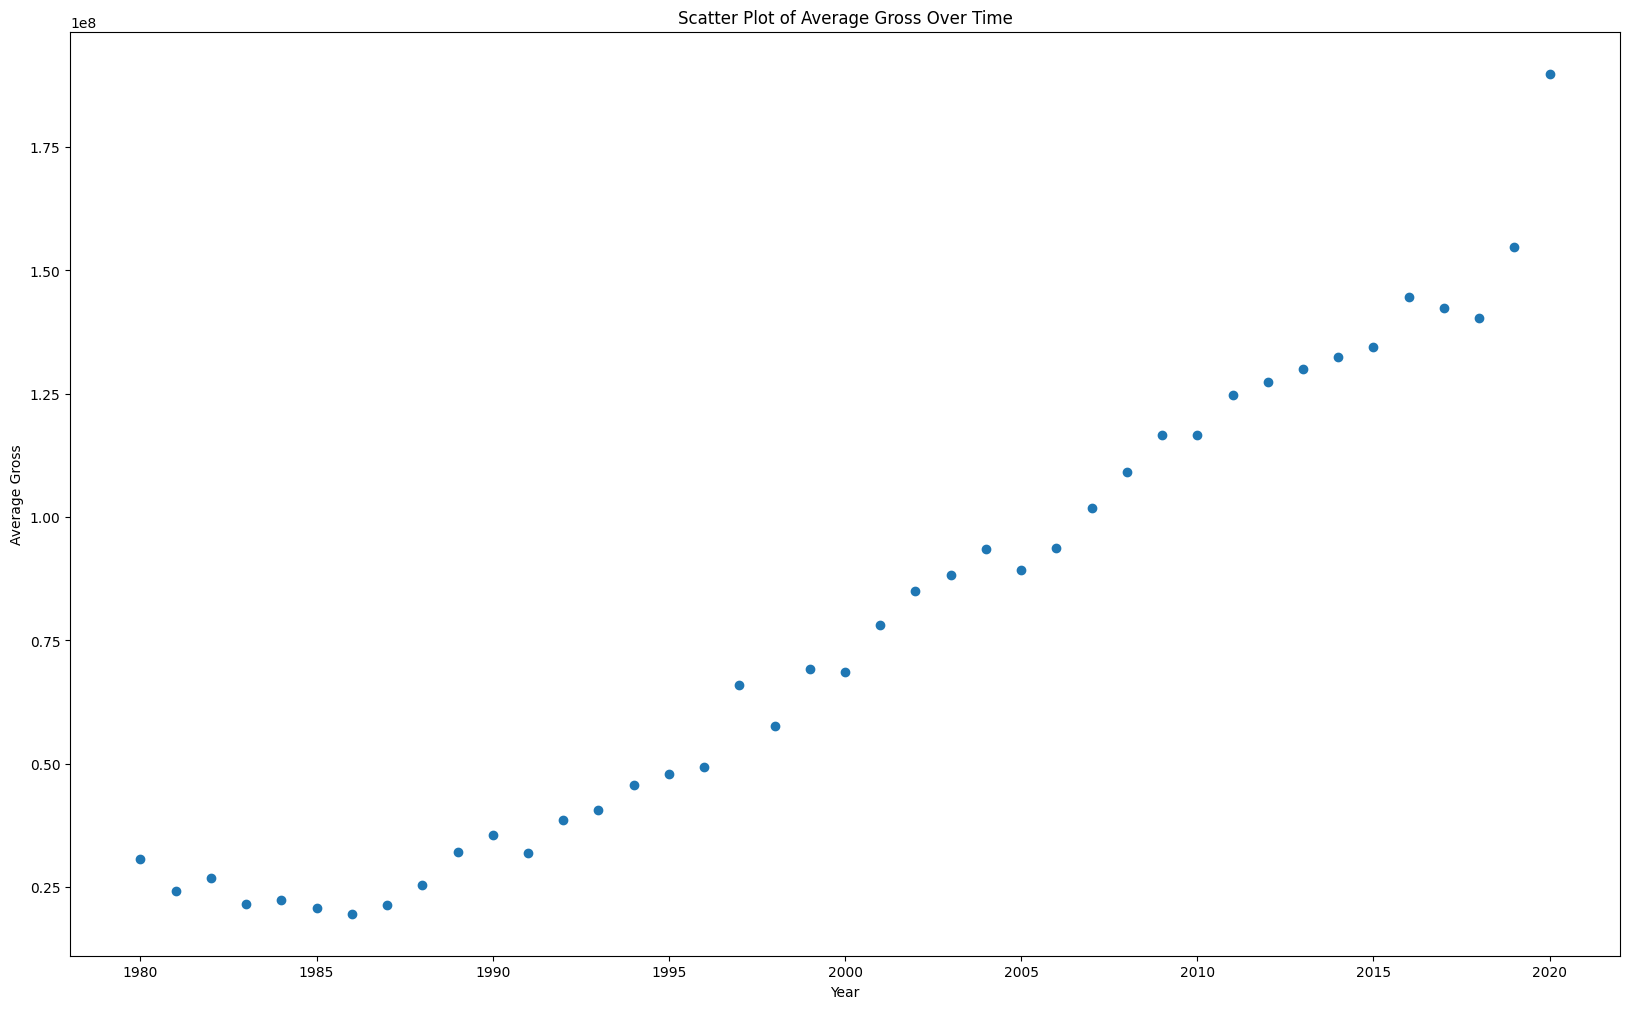

In [5]:
# Taking a look at average rating vs year

average_rating_per_year = movie_data.groupby("year")["gross"].mean()
fig, ax1 = plt.subplots(figsize=(20,12))
ax1.scatter(average_rating_per_year.index, average_rating_per_year.values)
ax1.set_xlabel("Year")
ax1.set_ylabel("Average Gross")
ax1.set_title("Scatter Plot of Average Gross Over Time")
plt.plot()

year_model = smf.ols(formula="gross ~ year", data=movie_data).fit()
year_model.summary()

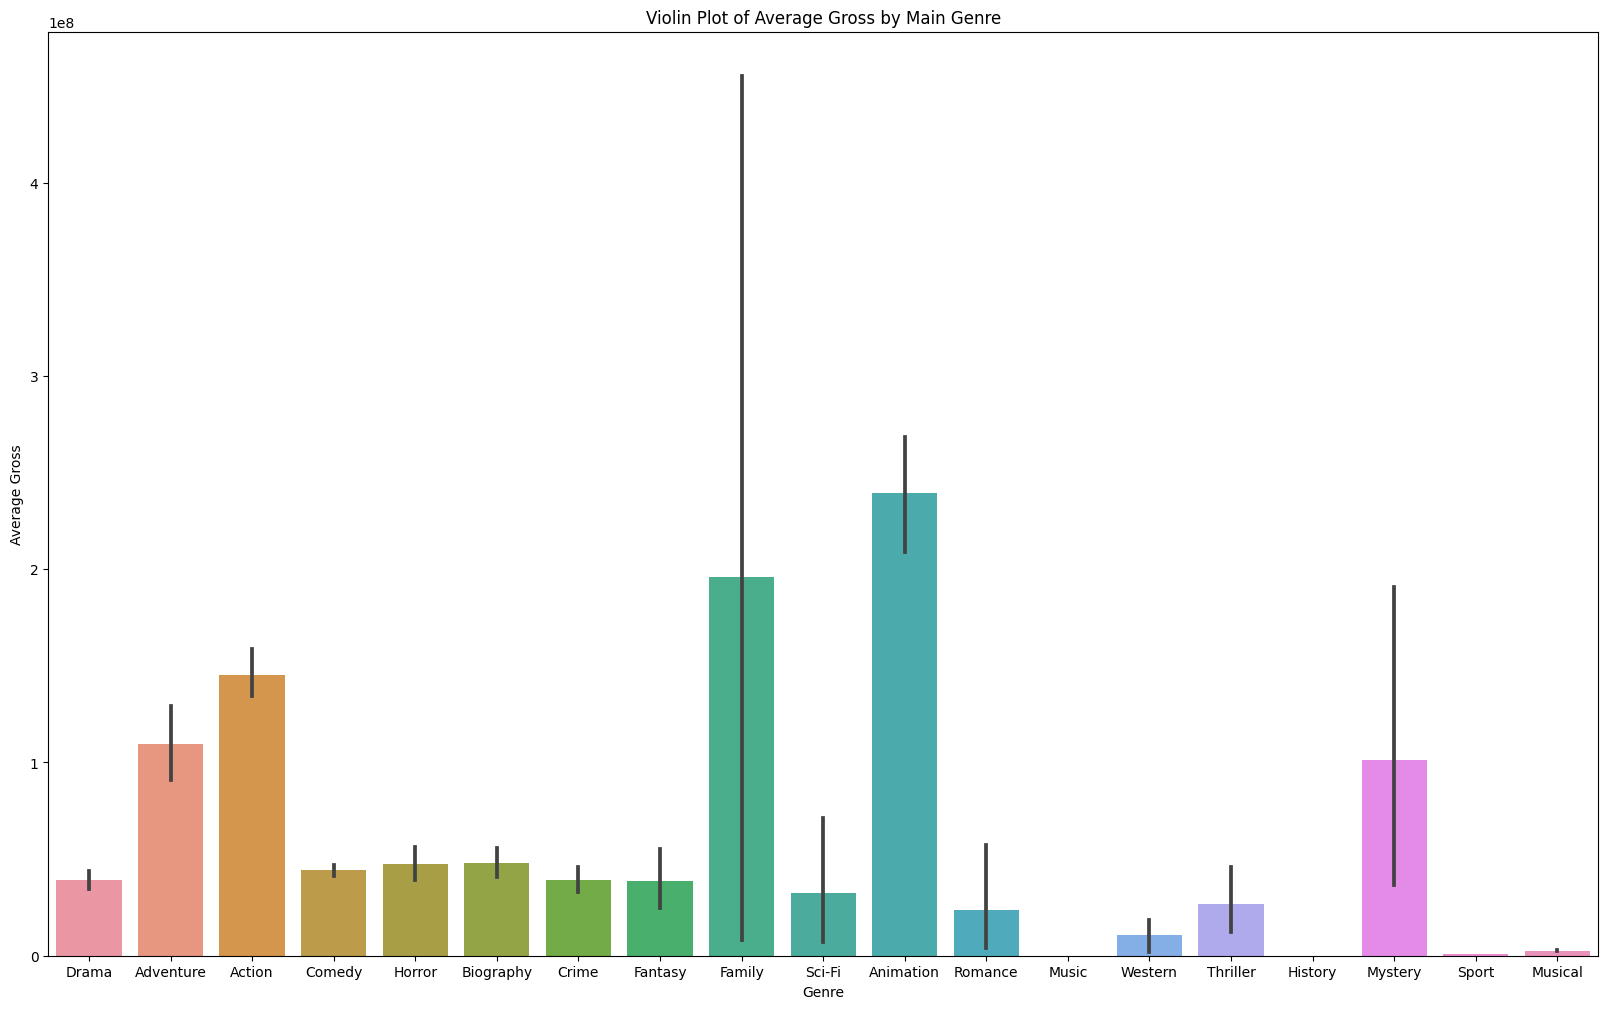

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     56.15
Date:                Mon, 12 Dec 2022   Prob (F-statistic):          3.21e-180
Time:                        14:45:15   Log-Likelihood:            -1.5171e+05
No. Observations:                7479   AIC:                         3.035e+05
Df Residuals:                    7461   BIC:                         3.036e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.455e+08   3.82e+06     38.098      0.000    1.38e+08    1.53e+08
genre[T.Adventure] -3.618e+07   8.53e+06     -4.244      0.000   -5.29e+07   -1.95e+07
genre[T.Animation]  9.372e+07   9.35e+06     10.023      0.000    7.54e+07    1.12e+08
genre[T.Biography] -9.763e+07   8.42e+06    -11.591      0.000   -1.14e+08   -8.11e+07
genre[T.Comedy]    -1.012e+08   5.07e+06    -19.950      0.000   -1.11e+08   -9.12e+07
genre[T.Crime]     -1.061e+08   7.72e+06    -13.743      0.000   -1.21e+08    -9.1e+07
genre[T.Drama]     -1.066e+08   5.59e+06    -19.077      0.000   -1.18e+08   -9.56e+07
genre[T.Family]     5.066e+07   4.73e+07      1.072      0.284    -4.2e+07    1.43e+08
genre[T.Fantasy]   -1.068e+08   2.41e+07     -4.426      0.000   -1.54e+08   -5.95e+07
genre[T.History]    1.068e-07   6.69e-08      1.596      0.110   -2.43e-08    2.38e-07
genre[T.Horror]    -9.814e+07    9.7e+06    -10.118      0.000   -1.17e+08   -7.91e+07
genre[T.Music]     -1.454e+08   1.56e+08     -0.930      0.352   -4.52e+08    1.61e+08
genre[T.Musical]   -1.429e+08   1.11e+08     -1.293      0.196    -3.6e+08    7.38e+07
genre[T.Mystery]   -4.433e+07   3.51e+07     -1.261      0.207   -1.13e+08    2.46e+07
genre[T.Romance]    -1.22e+08   5.54e+07     -2.203      0.028    -2.3e+08   -1.34e+07
genre[T.Sci-Fi]    -1.129e+08   5.54e+07     -2.040      0.041   -2.21e+08   -4.42e+06
genre[T.Sport]     -1.444e+08   1.56e+08     -0.924      0.355   -4.51e+08    1.62e+08
genre[T.Thriller]  -1.186e+08   4.53e+07     -2.620      0.009   -2.07e+08   -2.99e+07
genre[T.Western]   -1.348e+08   9.03e+07     -1.494      0.135   -3.12e+08    4.21e+07
==============================================================================
Omnibus:                     7881.335   Durbin-Watson:                   1.454
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           779800.722
Skew:                           5.167   Prob(JB):                         0.00
Kurtosis:                      51.945   Cond. No.                     1.62e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.27e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [6]:
fig, ax2 = plt.subplots(figsize=(20,12))
sns.barplot(data=movie_data, x="genre", y="gross")
ax2.set_xlabel("Genre")
ax2.set_ylabel("Average Gross")
ax2.set_title("Violin Plot of Average Gross by Main Genre")
plt.show()

genre_model = smf.ols(formula="gross ~ genre", data=movie_data).fit()
genre_model.summary()

C:\Users\Jacob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


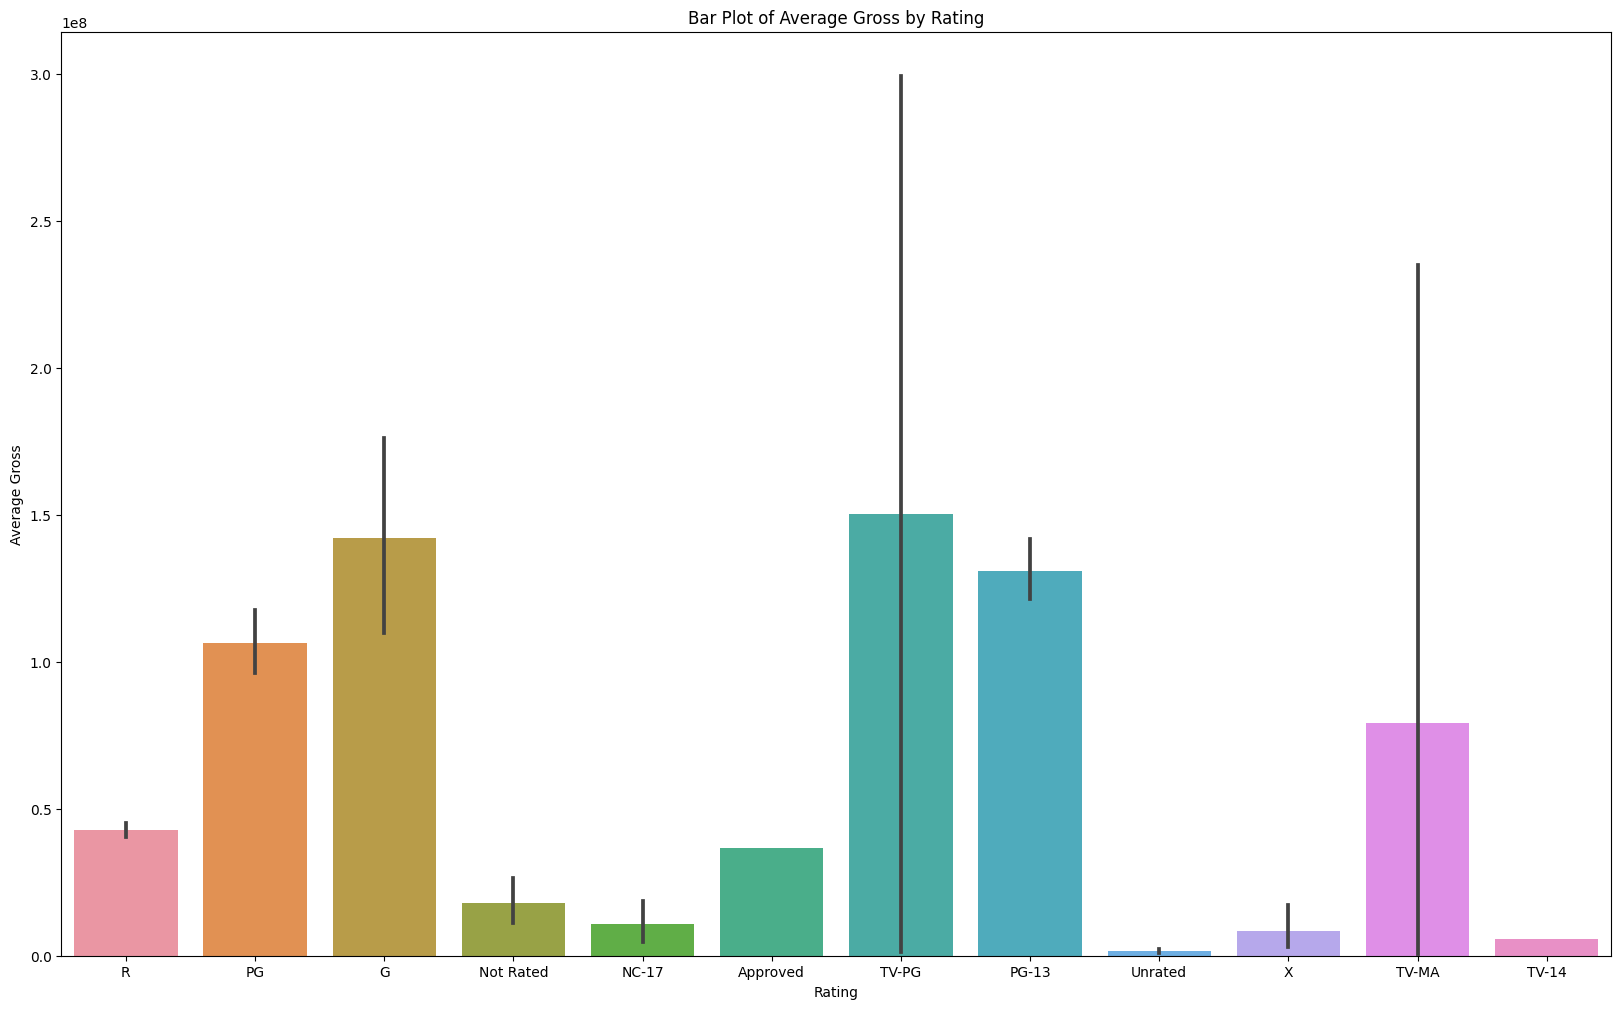

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     46.88
Date:                Mon, 12 Dec 2022   Prob (F-statistic):          5.80e-100
Time:                        14:45:16   Log-Likelihood:            -1.5083e+05
No. Observations:                7425   AIC:                         3.017e+05
Df Residuals:                    7413   BIC:                         3.018e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            3.657e+07   1.61e+08      0.227      0.820   -2.79e+08    3.52e+08
rating[T.G]          1.055e+08   1.61e+08      0.654      0.513   -2.11e+08    4.22e+08
rating[T.NC-17]      -2.58e+07   1.64e+08     -0.157      0.875   -3.48e+08    2.96e+08
rating[T.Not Rated] -1.877e+07   1.61e+08     -0.117      0.907   -3.34e+08    2.97e+08
rating[T.PG]         6.988e+07   1.61e+08      0.435      0.664   -2.45e+08    3.85e+08
rating[T.PG-13]      9.431e+07   1.61e+08      0.587      0.557   -2.21e+08    4.09e+08
rating[T.R]          6.104e+06   1.61e+08      0.038      0.970   -3.09e+08    3.21e+08
rating[T.TV-14]     -3.081e+07   2.27e+08     -0.136      0.892   -4.76e+08    4.15e+08
rating[T.TV-MA]      4.261e+07   1.69e+08      0.251      0.801    -2.9e+08    3.75e+08
rating[T.TV-PG]      1.138e+08    1.8e+08      0.633      0.527   -2.38e+08    4.66e+08
rating[T.Unrated]   -3.496e+07   1.62e+08     -0.215      0.830   -3.53e+08    2.83e+08
rating[T.X]         -2.808e+07   1.86e+08     -0.151      0.880   -3.92e+08    3.36e+08
==============================================================================
Omnibus:                     7812.644   Durbin-Watson:                   1.422
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           692716.719
Skew:                           5.202   Prob(JB):                         0.00
Kurtosis:                      49.161   Cond. No.                         351.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
fig, ax3 = plt.subplots(figsize=(20,12))
sns.barplot(data=movie_data, x="rating", y="gross")
ax3.set_xlabel("Rating")
ax3.set_ylabel("Average Gross")
ax3.set_title("Bar Plot of Average Gross by Rating")
plt.show()

rating_model = smf.ols(formula="gross ~ rating", data=movie_data).fit()
rating_model.summary()

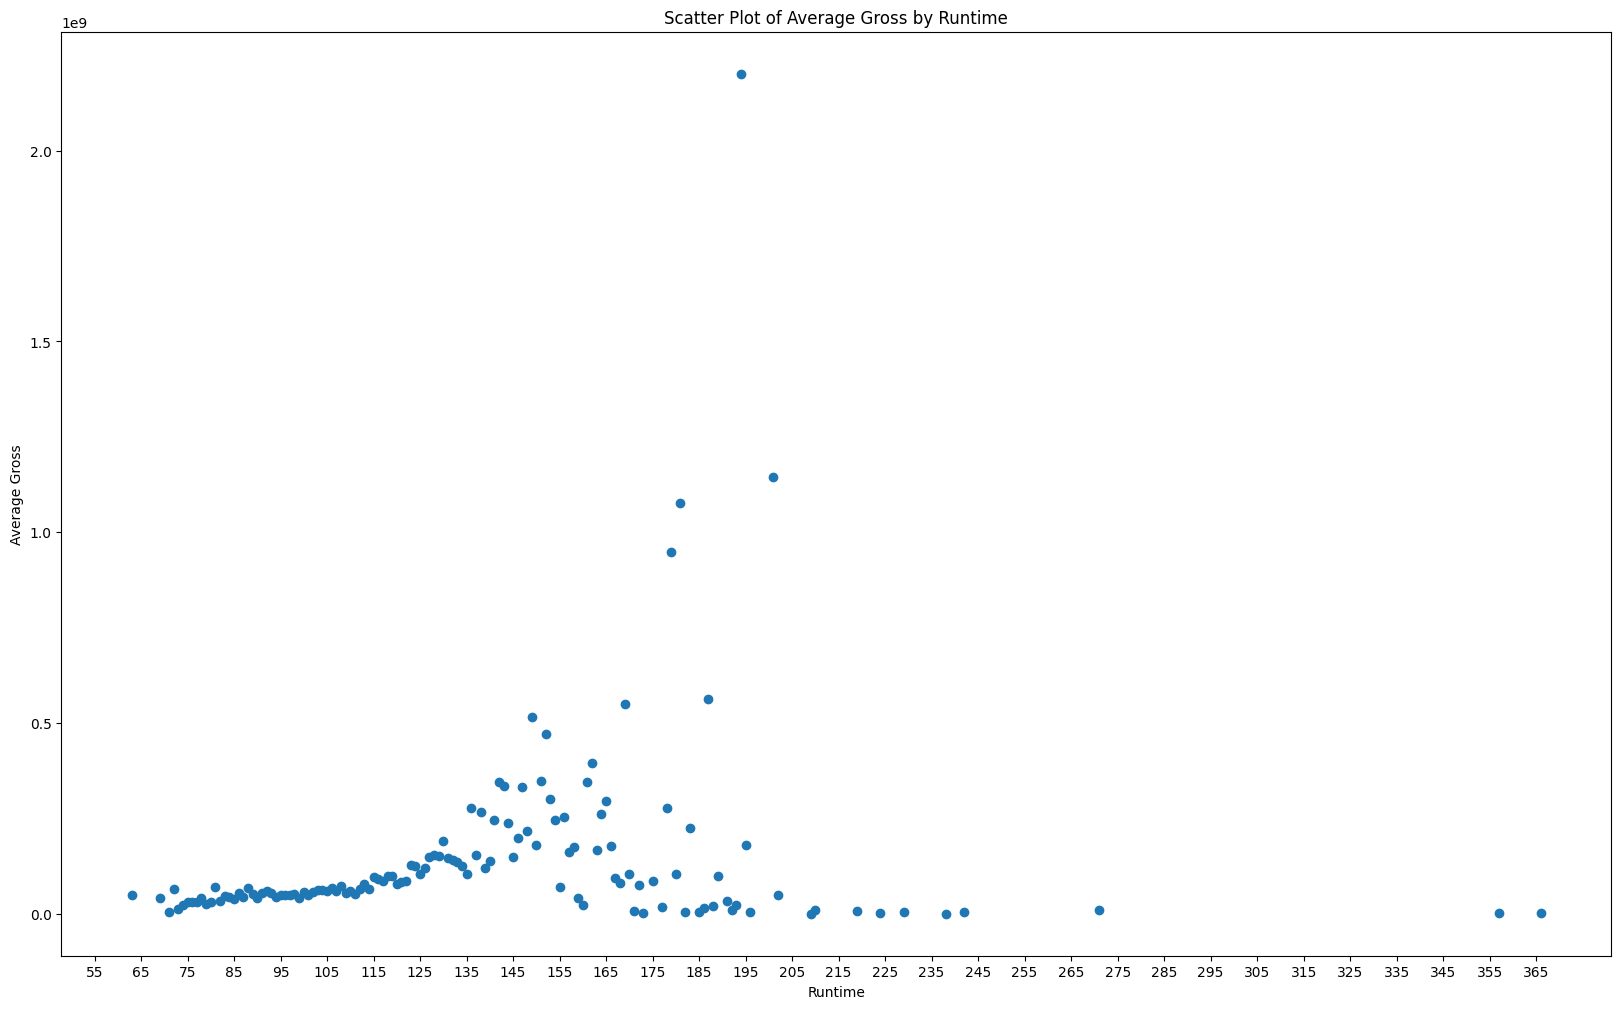

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     478.3
Date:                Mon, 12 Dec 2022   Prob (F-statistic):          7.95e-103
Time:                        14:45:16   Log-Likelihood:            -1.5191e+05
No. Observations:                7478   AIC:                         3.038e+05
Df Residuals:                    7476   BIC:                         3.038e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.574e+08   1.09e+07    -14.379      0.000   -1.79e+08   -1.36e+08
runtime     2.195e+06      1e+05     21.870      0.000       2e+06    2.39e+06
==============================================================================
Omnibus:                     7599.397   Durbin-Watson:                   1.536
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           581245.664
Skew:                           4.953   Prob(JB):                         0.00
Kurtosis:                      45.039   Cond. No.                         642.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
average_rating_per_year = movie_data.groupby("runtime")["gross"].mean()
fig, ax4 = plt.subplots(figsize=(20,12))
ax4.scatter(average_rating_per_year.index, average_rating_per_year.values)
ax4.set_xticks(np.arange(float(min(movie_data["runtime"])), float(max(movie_data["runtime"])), 10.0))
ax4.set_xlabel("Runtime")
ax4.set_ylabel("Average Gross")
ax4.set_title("Scatter Plot of Average Gross by Runtime")
plt.show()

runtime_model = smf.ols(formula="gross ~ runtime", data=movie_data).fit()
runtime_model.summary()

In [9]:
# Looks like year made, genre, and runtime have an effect on IMDB rating.
# Now we use regression with those and observe the outcome.

In [10]:
model = smf.ols(formula="gross ~ year + genre + rating + runtime", data=movie_data).fit()
 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     95.60
Date:                Mon, 12 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:45:16   Log-Likelihood:            -1.4984e+05
No. Observations:                7424   AIC:                         2.997e+05
Df Residuals:                    7393   BIC:                         3.000e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -6.235e+09   3.43e+08    -18.156      0.000   -6.91e+09   -5.56e+09
genre[T.Adventure]  -3.674e+07   8.01e+06     -4.588      0.000   -5.24e+07    -2.1e+07
genre[T.Animation]   1.179e+08   1.01e+07     11.670      0.000    9.81e+07    1.38e+08
genre[T.Biography]  -1.283e+08   7.71e+06    -16.632      0.000   -1.43e+08   -1.13e+08
genre[T.Comedy]      -7.01e+07   4.71e+06    -14.899      0.000   -7.93e+07   -6.09e+07
genre[T.Crime]      -7.558e+07   7.16e+06    -10.555      0.000   -8.96e+07   -6.15e+07
genre[T.Drama]      -9.919e+07   5.14e+06    -19.293      0.000   -1.09e+08   -8.91e+07
genre[T.Family]      1.047e+08   4.51e+07      2.318      0.020    1.62e+07    1.93e+08
genre[T.Fantasy]    -4.662e+07   2.21e+07     -2.107      0.035      -9e+07   -3.25e+06
genre[T.History]    -1.368e-07   2.61e-07     -0.523      0.601   -6.49e-07    3.76e-07
genre[T.Horror]     -3.576e+07   8.98e+06     -3.980      0.000   -5.34e+07   -1.81e+07
genre[T.Music]      -6.904e+07   1.41e+08     -0.488      0.625   -3.46e+08    2.08e+08
genre[T.Musical]    -2.136e+08   1.42e+08     -1.508      0.132   -4.91e+08    6.41e+07
genre[T.Mystery]    -2.981e+07   3.18e+07     -0.937      0.349   -9.22e+07    3.25e+07
genre[T.Romance]    -9.777e+07   5.01e+07     -1.951      0.051   -1.96e+08     4.5e+05
genre[T.Sci-Fi]      -6.09e+07   5.01e+07     -1.215      0.224   -1.59e+08    3.73e+07
genre[T.Sport]      -1.911e+08   1.41e+08     -1.352      0.177   -4.68e+08     8.6e+07
genre[T.Thriller]   -6.878e+07    4.1e+07     -1.679      0.093   -1.49e+08    1.15e+07
genre[T.Western]     -3.91e+07   8.17e+07     -0.479      0.632   -1.99e+08    1.21e+08
rating[T.G]          2.557e+07   1.42e+08      0.180      0.857   -2.53e+08    3.04e+08
rating[T.NC-17]     -5.736e+06   1.45e+08     -0.040      0.968   -2.89e+08    2.78e+08
rating[T.Not Rated] -7.849e+07   1.42e+08     -0.553      0.580   -3.56e+08       2e+08
rating[T.PG]         4.913e+07   1.42e+08      0.347      0.728   -2.28e+08    3.27e+08
rating[T.PG-13]      5.927e+07   1.42e+08      0.419      0.675   -2.18e+08    3.37e+08
rating[T.R]         -9.444e+06   1.42e+08     -0.067      0.947   -2.87e+08    2.68e+08
rating[T.TV-14]     -1.377e+08      2e+08     -0.688      0.491    -5.3e+08    2.54e+08
rating[T.TV-MA]     -2.175e+07   1.49e+08     -0.146      0.884   -3.14e+08    2.71e+08
rating[T.TV-PG]     -9.205e+06   1.58e+08     -0.058      0.954   -3.19e+08    3.01e+08
rating[T.Unrated]   -1.657e+07   1.43e+08     -0.116      0.908   -2.97e+08    2.64e+08
rating[T.X]         -1.913e+07   1.63e+08     -0.117      0.907   -3.39e+08    3.01e+08
year                 3.031e+06   1.58e+05     19.141      0.000    2.72e+06    3.34e+06
runtime              2.646e+06   9.64e+04     27.457      0.000    2.46e+06    2.83e+06
===

In [11]:
movie_data["model_resid"] = model.resid

model_residuals_per_year = []
model_years = movie_data["year"].unique()

for year in movie_data["year"].unique():
    current_year_list = []
    for row in movie_data[~movie_data['model_resid'].isnull()].iterrows():
        if(row[1]['year'] == year):
            current_year_list.append(row[1]["model_resid"])
    model_residuals_per_year.append(current_year_list)

Text(0.5, 1.0, 'Residuals vs Year For Model')

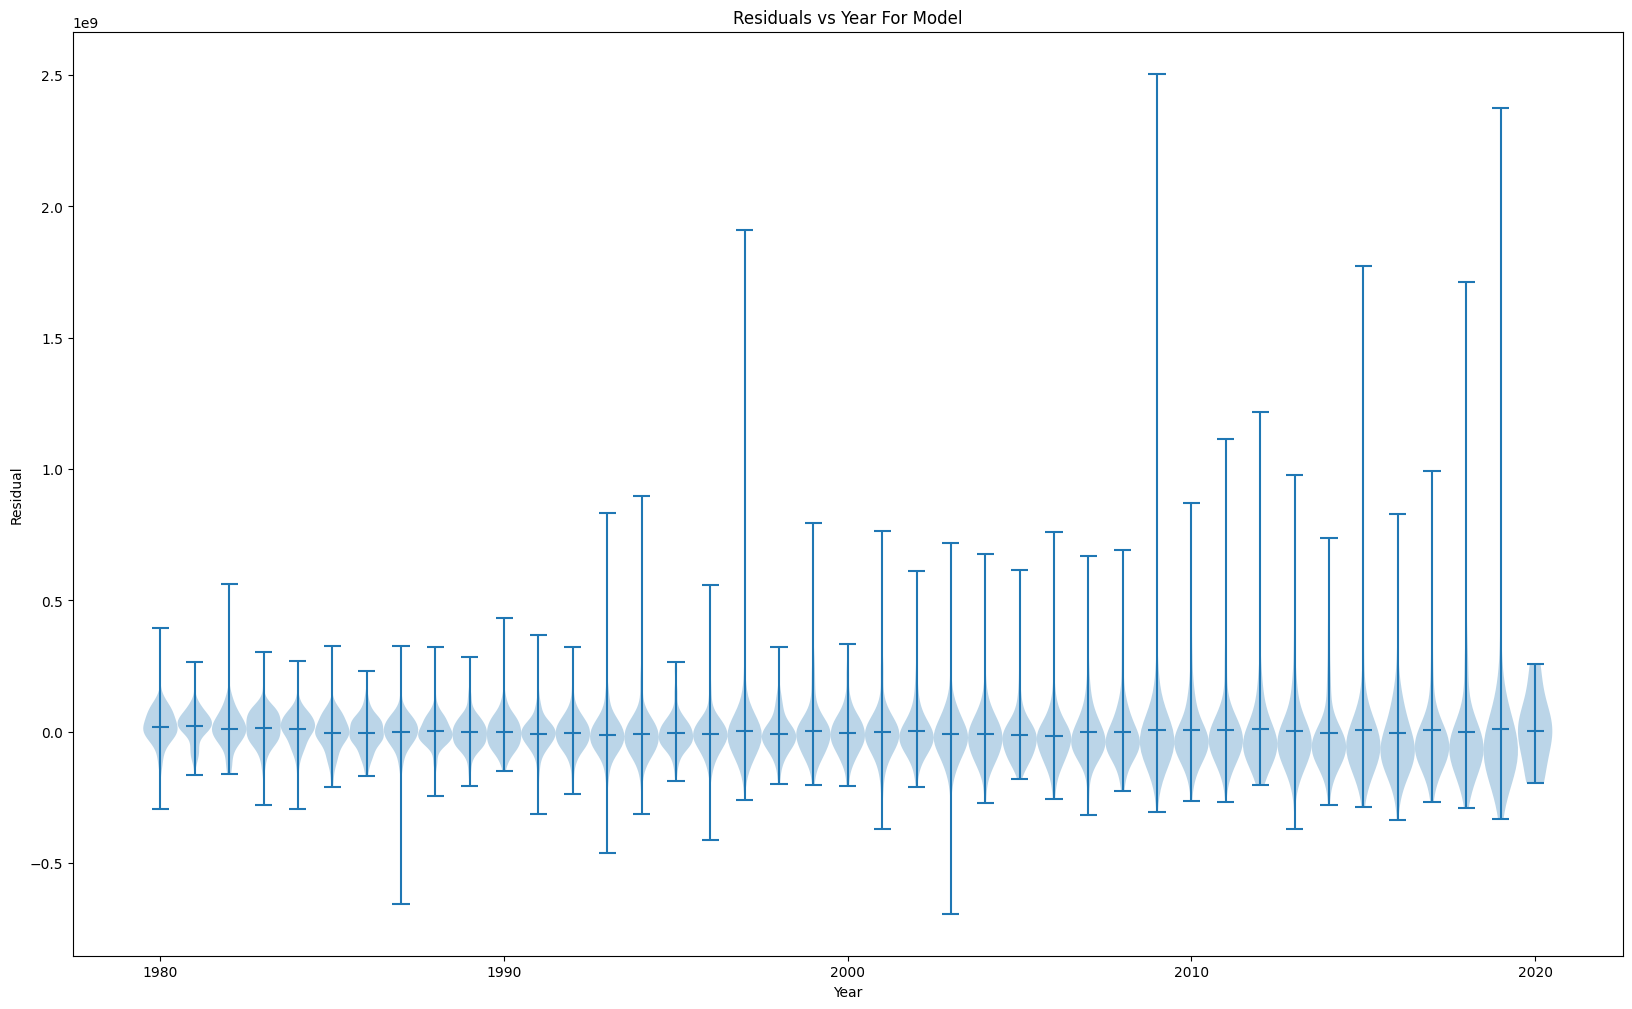

In [12]:
fig, ax6 = plt.subplots(figsize=(20,12))
ax6.violinplot(model_residuals_per_year, model_years, widths = 1, showmeans=True)
ax6.set_xlabel("Year")
ax6.set_ylabel("Residual")
ax6.set_title("Residuals vs Year For Model")